# Kickstarter Projects

The objective of this analysis to provide descriptive analysis of the data and to see if we can build a relationship between any of the parameters (country, category, ..etc) and state (success/failure) of the project 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ks = pd.read_csv("ks-projects-201801.csv")
print (ks.shape)
ks.info()

(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ 

In [3]:
ks.rename(columns={"usd pledged":"usd_pledged"},inplace=True) 
ks['deadline'] = pd.to_datetime(ks['deadline'])
ks['launched'] = pd.to_datetime(ks['launched'])
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378657 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd_pledged       374864 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [4]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


**From Kaggle Data Overview :**
    
- usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

- usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

- usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).
    
To decide on which field to use for our evalaution, we will compare all transactions in done USD (currency is USD) and compare the value of pledged vs. usd_pledged and usd usd_pledged_real

In [5]:
ks_usd = ks[ks['currency']== 'USD']
cmp1 = np.where(ks_usd["usd_pledged"] == ks_usd["pledged"], True, False)
cmp2 = np.where(ks_usd["usd_pledged_real"] == ks_usd["pledged"], True, False)

print ("Comparing the values of 'pledged' with 'usd_pledged' & 'usd_pledged_real' for all data in USD currency")
print (ks_usd.shape)
print (ks_usd[cmp1].shape)
print (ks_usd[cmp2].shape)


Comparing the values of 'pledged' with 'usd_pledged' & 'usd_pledged_real' for all data in USD currency
(295365, 15)
(248784, 15)
(295365, 15)


usd_pledged_real is more accurate to be used for our evaluation

In [6]:
ks['year']= ks['launched'].map(lambda x: x.year)
#ks['month'] = ks['launched'].map(lambda x: x.month)
                     
ks_yr = ks.groupby(["year"]).count()['ID'].reset_index()
ks_yr

,year,ID
0,1970,7
1,2009,1329
2,2010,10519
3,2011,26237
4,2012,41165
5,2013,44851
6,2014,67745
7,2015,77300
8,2016,57184
9,2017,52200


In [7]:
# remove the data from year 1970

ks = ks[ks['year'] != 1970]
ks_yr = ks.groupby(["year"]).count()['ID'].reset_index()
ks_yr

,year,ID
0,2009,1329
1,2010,10519
2,2011,26237
3,2012,41165
4,2013,44851
5,2014,67745
6,2015,77300
7,2016,57184
8,2017,52200
9,2018,124


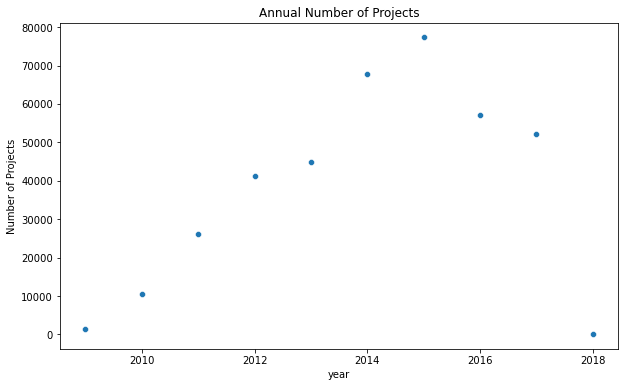

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(ax=ax, x = 'year', y='ID', data = ks_yr)
ax.set(xlabel="year", ylabel="Number of Projects", title="Annual Number of Projects")

plt.show()

In [9]:
ks_state_yr = ks.groupby(["year","state"]).count()['ID'].reset_index()
ks_state_yr.head()


,year,state,ID
0,2009,canceled,150
1,2009,failed,600
2,2009,successful,579
3,2010,canceled,926
4,2010,failed,4984


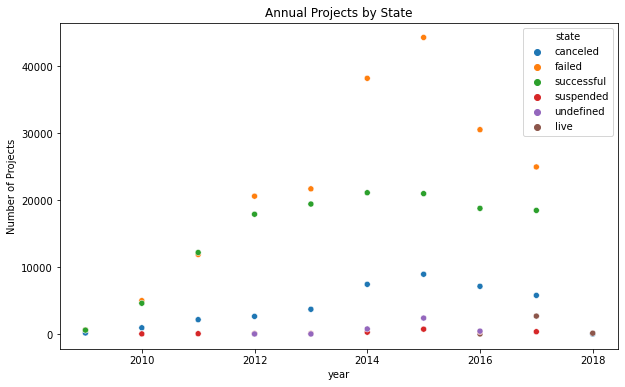

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(ax=ax, x = 'year', y='ID', hue = 'state', data = ks_state_yr)
ax.set(xlabel="year", ylabel="Number of Projects", title="Annual Projects by State")

plt.show()

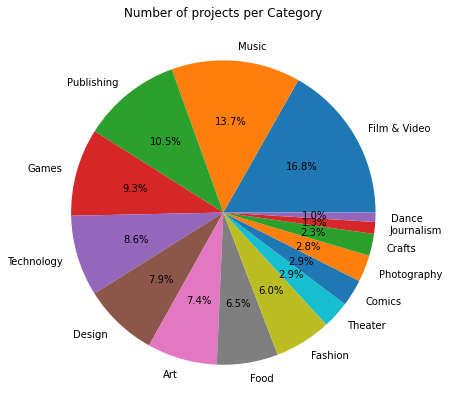

In [11]:
ks_cat_count = ks.groupby('main_category').size().sort_values(ascending=False)
ks_cat_goal = ks.groupby('main_category').sum()["usd_goal_real"].sort_values(ascending=False)
ks_cat_pldg = ks.groupby('main_category').sum()["usd_pledged_real"].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(17,7))
ax.pie(ks_cat_count, labels=ks_cat_count.index, autopct='%1.1f%%')
ax.set_title('Number of projects per Category')

plt.show()

Main categories are "Film & Video" followed by "Music", "Publishing" and "Games" representing 50% of the total projects.


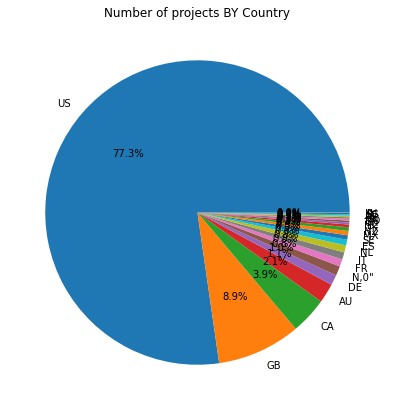

In [12]:
ks_cntry_cnt = ks.groupby('country').size().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(17,7))
ax.pie(ks_cntry_cnt, labels=ks_cntry_cnt.index, autopct='%1.1f%%')
ax.set_title('Number of projects BY Country')
plt.show()

77% of the projects were orginated from USA followed by UK (8.9%) and Canada (3.9) 

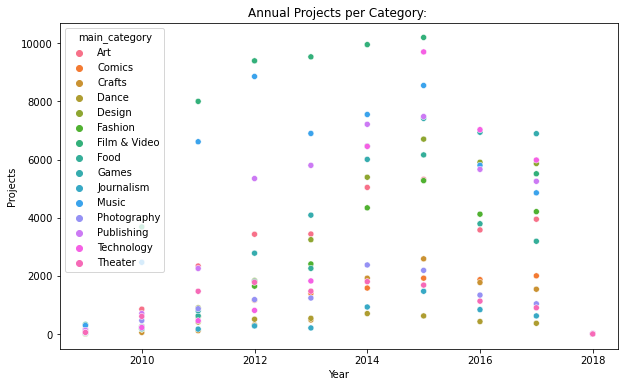

In [13]:
ks['year']= ks['launched'].map(lambda x: x.year)
#ks['month'] = ks['launched'].map(lambda x: x.month)
                     
ks_cat_yr = ks.groupby(["year","main_category"]).count()['ID'].reset_index()
#print (ks_cat_yr)

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(ax=ax, x = 'year', y='ID', hue = 'main_category', data = ks_cat_yr)
ax.set(xlabel="Year", ylabel="Projects", title="Annual Projects per Category: ")

plt.show()

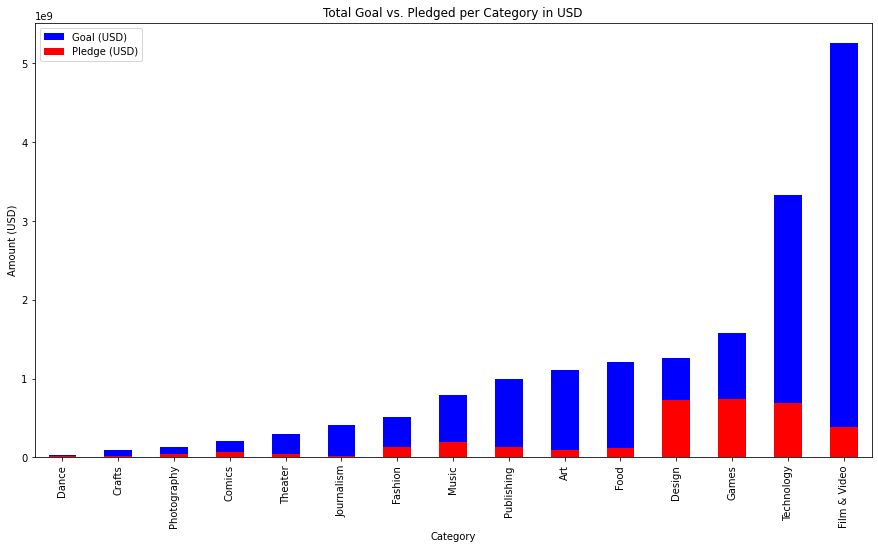

In [14]:
ks_mg_ttl =  ks.groupby('main_category', as_index=False)[['usd_goal_real','usd_pledged_real']].sum()
ks_mg_ttl = ks_mg_ttl.sort_values("usd_goal_real")
#print (ks_mg_ttl)

fig, ax = plt.subplots(figsize=(15, 8))
ks_mg_ttl.plot(x="main_category", y="usd_goal_real", kind="bar", ax=ax, color="blue", width=0.5, label="Goal (USD)")
ks_mg_ttl.plot(x="main_category", y="usd_pledged_real", kind="bar", ax=ax, color="red", width=0.5, label="Pledge (USD)")
ax.legend()
ax.set_title('Total Goal vs. Pledged per Category in USD')
ax.set_xlabel("Category")
ax.set_ylabel("Amount (USD)")
plt.show()


Total Goal Amount set for Film & Video is the highest followed by Technology & Games. But looking at Total pledged amount, Games, Design & Games are outperforming Films & Video and the other categories

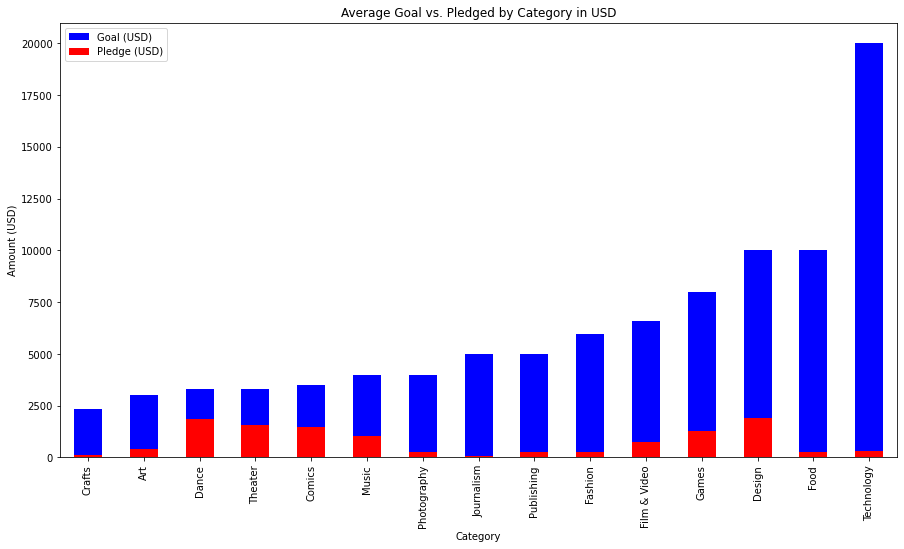

In [15]:
ks_mg_avg =  ks.groupby('main_category', as_index=False)[['usd_goal_real','usd_pledged_real']].median()
ks_mg_avg = ks_mg_avg.sort_values("usd_goal_real")
#print (ks_mg_avg)

fig, ax = plt.subplots(figsize=(15, 8))
ks_mg_avg.plot(x="main_category", y="usd_goal_real", kind="bar", ax=ax, color="blue", width=0.5, label="Goal (USD)")
ks_mg_avg.plot(x="main_category", y="usd_pledged_real", kind="bar", ax=ax, color="red", width=0.5, label="Pledge (USD)")
ax.legend()
ax.set_title('Average Goal vs. Pledged by Category in USD')
ax.set_xlabel("Category")
ax.set_ylabel("Amount (USD)")
plt.show()


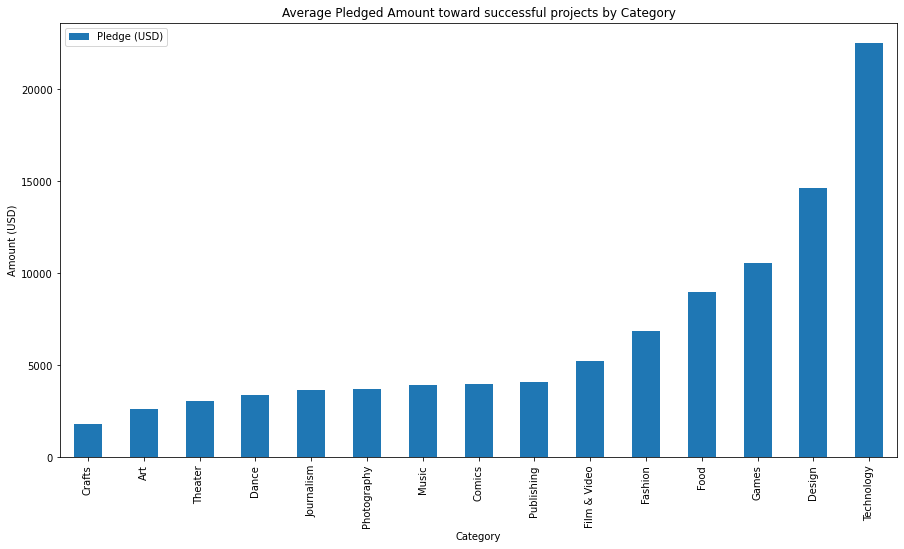

In [16]:
ks_mg_sc_avg =  ks[ks['state']=='successful'].groupby('main_category', as_index=False)[['usd_pledged_real']].median()
ks_mg_sc_avg = ks_mg_sc_avg.sort_values("usd_pledged_real")
#print (ks_mg_avg)

fig, ax = plt.subplots(figsize=(15, 8))
#ks_mg_sc_avg.plot(x="main_category", y="usd_goal_real", kind="bar", ax=ax, color="blue", width=0.5, label="Goal (USD)")
ks_mg_sc_avg.plot(x="main_category", y="usd_pledged_real", kind="bar", ax=ax, width=0.5, label="Pledge (USD)")
ax.legend()
ax.set_title('Average Pledged Amount toward successful projects by Category')
ax.set_xlabel("Category")
ax.set_ylabel("Amount (USD)")
plt.show()


Now looking at the median per project, the average goal per project in Technology is the highest followed by Food and Design. As for the average pledged amount, Design, Dance, Theater & Comics are taking the lead. 

Text(0.5, 1.0, 'Projects by State')

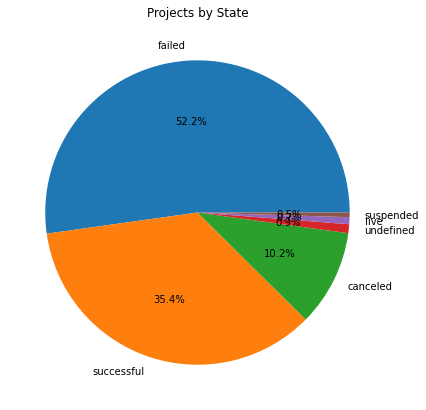

In [17]:
ks_state_cnt = ks.groupby('state').size().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,7))
ax.pie(ks_state_cnt, labels=ks_state_cnt.index, autopct='%1.1f%%')
ax.set_title('Projects by State')

More that 50% of the projects failed to acheive their Goal while only 35% were successful

<AxesSubplot:title={'center':'State by Category'}, xlabel='Main Category'>

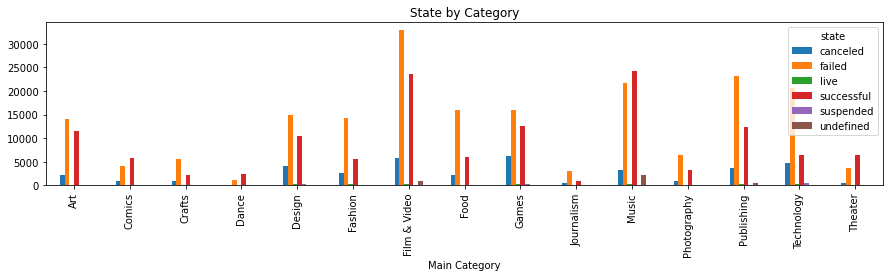

In [18]:
ks_cat_state = ks.groupby(['main_category', 'state']).size().reset_index().pivot(columns='state', index='main_category', values=0)
#print (ks_cat_state.head)

ks_cat_state.plot(kind='bar', stacked=False, title="State by Category", figsize=(15,3), xlabel="Main Category")


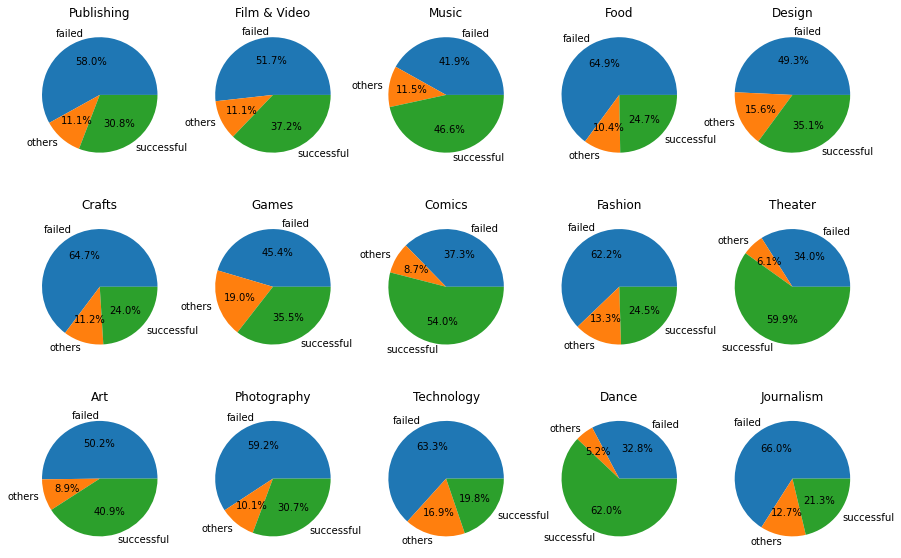

In [19]:
col = ks['main_category'].unique()

rev_state = {'failed':'failed','successful':'successful','canceled':'others',
           'live':'others','undefined':'others','suspended':'others'}
ks["rev_state"] = [rev_state[st] for st in ks["state"] ]

cnt = 1
fig = plt.figure(figsize=(15,10))

for cat in col: 
    ax = fig.add_subplot(int(len(col)/5),5,cnt)
    ks[ks["main_category"]==cat].sort_values(["rev_state"],ascending=False).groupby("rev_state").size().plot(ax=ax, kind="pie", title=cat, xlabel="", ylabel="", autopct='%1.1f%%')
    cnt=cnt+1

<AxesSubplot:title={'center':'Successful vs unsuccessful by Category'}, xlabel='Category'>

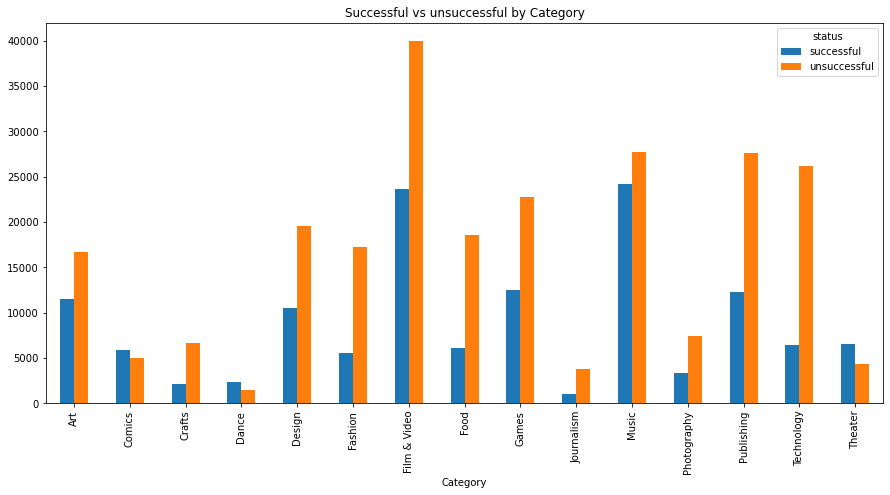

In [20]:
#fig, ax = plt.subplots(figsize=(15, 8))
#x = np.arange(len(col))
#bar_width = 0.4
#b1 = ax.bar(x, ks[ks['state']=='successful'].groupby(['main_category']).size(), width=bar_width, label='successful')
#b2 = ax.bar(x + bar_width, ks[ks['state']!='successful'].groupby(['main_category']).size(),width=bar_width,label='others')

#ax.legend()
#ax.set_title('Number of Successful projects vs. others per Category')
#ax.set_xticks(x + bar_width / 2)
#ax.set_xticklabels(col, rotation=90)

ks['status'] = ['successful' if x =='successful' else 'unsuccessful' for x in ks['state']]
ks_cat_status = ks.groupby(['main_category', 'status']).size().reset_index().pivot(columns='status', index='main_category', values=0)
#print (ks_cat_state2.head)

ks_cat_status.plot(kind='bar', stacked=False, title="Successful vs unsuccessful by Category", figsize=(15,7), xlabel="Category")


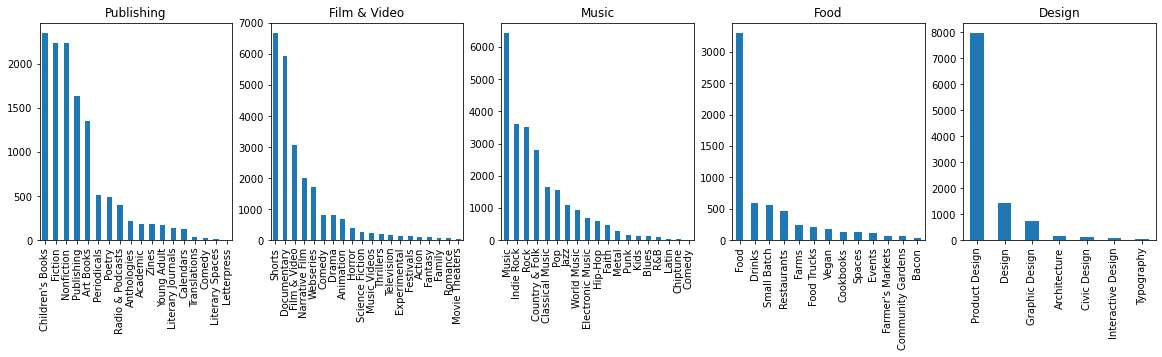

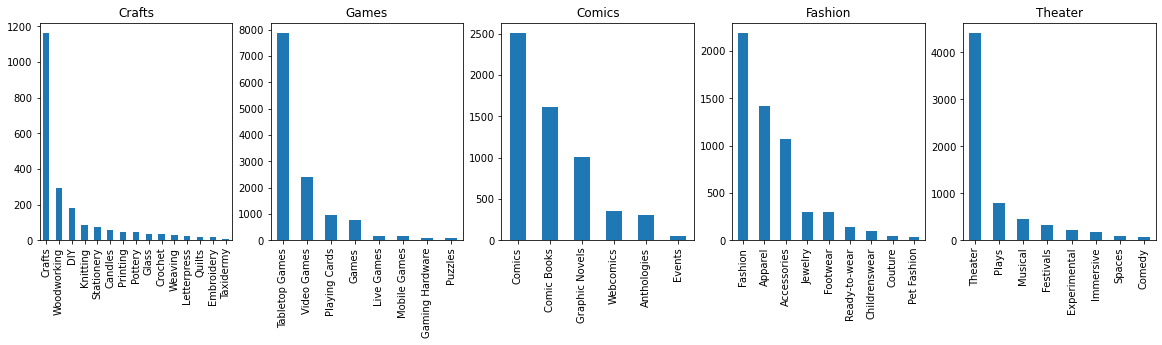

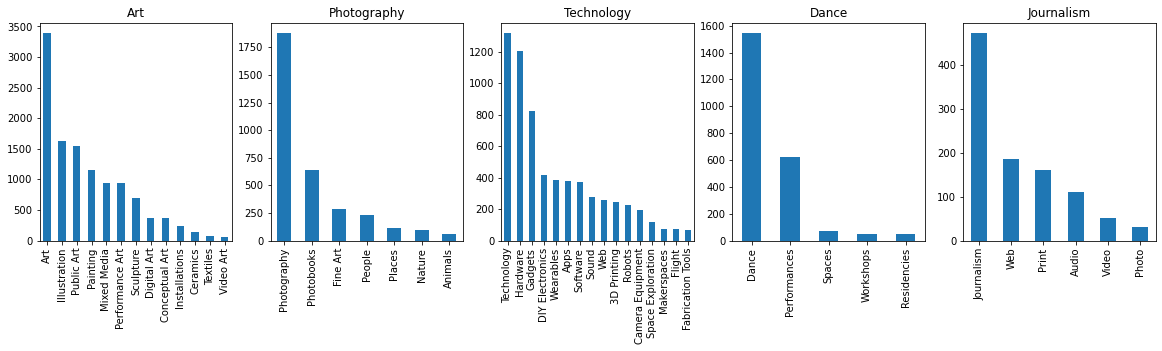

In [21]:
col = ks['main_category'].unique()
cnt = 0
for cat in col: 
    if (cnt == 0):
        fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(1,5,cnt+1)
    #indx = np.where()
    #ks_sub_cat = ks[ks["main_category"]==cat].groupby(['category', 'rev_state']).size().reset_index().pivot(columns='rev_state', index='category', values=0)
    ks_sub_cat = ks[(ks["main_category"]==cat) & (ks["state"]=="successful")].groupby(['category']).size().sort_values(ascending=False)
    ks_sub_cat.plot(kind='bar', stacked=True, title=cat, ax=ax, xlabel="", legend=None)
    cnt+=1
    if (cnt%5 == 0):
        plt.show()
        cnt=0
    

In [22]:
cmp = np.where((ks['main_category'] == ks['category']),True, False)
ks['match_cat'] = cmp
print (ks.groupby(['match_cat']).size())

match_cat
False    277615
True     101039
dtype: int64
